# Exploratory Data Analysis (EDA)

## Import Libraries

In [1]:
from collections import namedtuple
import gin
import logging
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from mlops.data.data_loader import DataLoader

### Configuration

In [2]:
# Clear any existing logging handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
    
# Set the logging level and format
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', 
                    level=logging.INFO,
                    stream=sys.stdout)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info("Logger Configured")

2024-10-01 13:47:15,924 | INFO : Logger Configured


In [3]:
# Load the configuration using gin
gin.enter_interactive_mode()
Args = namedtuple('Args', ['config'])
args = Args(config='..\..\mlops\config\config.gin')
gin.parse_config_file(args.config)
gin.bind_parameter('DataLoader.reload', False)

## Load Data

In [4]:
# Initialize the DataLoader instance using the gin configuration
data_loader = DataLoader()

# Load the data using the DataLoader
amphibians_df  = data_loader.load()

2024-10-01 13:47:15,955 | INFO : Base directory set to: C:\Users\arman\PycharmProjects\MLOps
2024-10-01 13:47:15,957 | INFO : Resolved local_csv_path to: None
2024-10-01 13:47:15,958 | INFO : Resolved local_zip_path to: C:\Users\arman\PycharmProjects\MLOps\data\amphibians.zip
2024-10-01 13:47:15,958 | INFO : Resolved extract_dir to: C:\Users\arman\PycharmProjects\MLOps\data\extracted
2024-10-01 13:47:15,959 | INFO : Reload is set to False and zip file already exists. Using existing zip file: C:\Users\arman\PycharmProjects\MLOps\data\amphibians.zip
2024-10-01 13:47:15,963 | INFO : Files in the archive: ['dataset.csv']
2024-10-01 13:47:15,964 | INFO : The file 'amphibians.csv' already exists. Skipping rename.
2024-10-01 13:47:15,965 | INFO : Deleted the original file 'dataset.csv'.
2024-10-01 13:47:15,966 | INFO : Loading data from: C:\Users\arman\PycharmProjects\MLOps\data\extracted\amphibians.csv
2024-10-01 13:47:15,969 | INFO : Data loaded successfully


## Preliminary Data Analysis

In [5]:
amphibians_df .head()

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,...,Ordinal.1,Categorical.8,Categorical.9,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
1,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
2,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0


In [6]:
amphibians_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Integer        190 non-null    object
 1   Categorical    190 non-null    object
 2   Numerical      190 non-null    object
 3   Numerical.1    190 non-null    object
 4   Categorical.1  190 non-null    object
 5   Categorical.2  190 non-null    object
 6   Categorical.3  190 non-null    object
 7   Categorical.4  190 non-null    object
 8   Categorical.5  190 non-null    object
 9   Categorical.6  190 non-null    object
 10  Categorical.7  190 non-null    object
 11  Numerical.2    190 non-null    object
 12  Ordinal        190 non-null    object
 13  Ordinal.1      190 non-null    object
 14  Categorical.8  190 non-null    object
 15  Categorical.9  190 non-null    object
 16  Label 1        190 non-null    object
 17  Label 2        190 non-null    object
 18  Label 3        190 non-null   

## Initial Data Preprocessing

In [7]:
# Rename columns based on the considerations provided
amphibians_df.columns = ['ID', 'MV', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 
                         'OR', 'RR', 'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs', 
                         'Common toad', 'Fire-bellied toad', 'Tree frog', 
                         'Common newt', 'Great crested newt']

# Convert columns to appropriate data types
amphibians_df['ID'] = pd.to_numeric(amphibians_df['ID'], errors='coerce')
amphibians_df['SR'] = pd.to_numeric(amphibians_df['SR'], errors='coerce')
amphibians_df['NR'] = pd.to_numeric(amphibians_df['NR'], errors='coerce')
amphibians_df['OR'] = pd.to_numeric(amphibians_df['OR'], errors='coerce')
amphibians_df['RR'] = pd.to_numeric(amphibians_df['RR'], errors='coerce')
amphibians_df['BR'] = pd.to_numeric(amphibians_df['BR'], errors='coerce')

# Convert categorical columns
categorical_columns = ['MV', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'MR', 'CR', 
                       'Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 
                       'Tree frog', 'Common newt', 'Great crested newt']

numerical_columns = ['ID', 'SR', 'NR', 'OR', 'RR', 'BR']

for col in categorical_columns:
    amphibians_df[col] = amphibians_df[col].astype('category')

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [8]:
amphibians_df.describe()

,ID,SR,NR,OR,RR,BR
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,95.000000,9633.227513,1.566138,89.962963,2.333333,2.502646
std,54.703748,46256.078309,1.544419,19.904926,2.520132,2.640971
min,1.000000,30.000000,1.000000,25.000000,0.000000,0.000000
25%,48.000000,300.000000,1.000000,99.000000,1.000000,1.000000
50%,95.000000,700.000000,1.000000,100.000000,1.000000,1.000000
75%,142.000000,3300.000000,1.000000,100.000000,5.000000,5.000000
max,189.000000,500000.000000,12.000000,100.000000,10.000000,10.000000


### Missing Values

In [9]:
missing_values = amphibians_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
logger.info("\nColumns with Missing Values:")
logger.info(missing_values)

2024-10-01 13:47:16,143 | INFO : 
Columns with Missing Values:
2024-10-01 13:47:16,144 | INFO : ID    1
SR    1
NR    1
OR    1
RR    1
BR    1
dtype: int64


#### Distribution of Categorical Columns

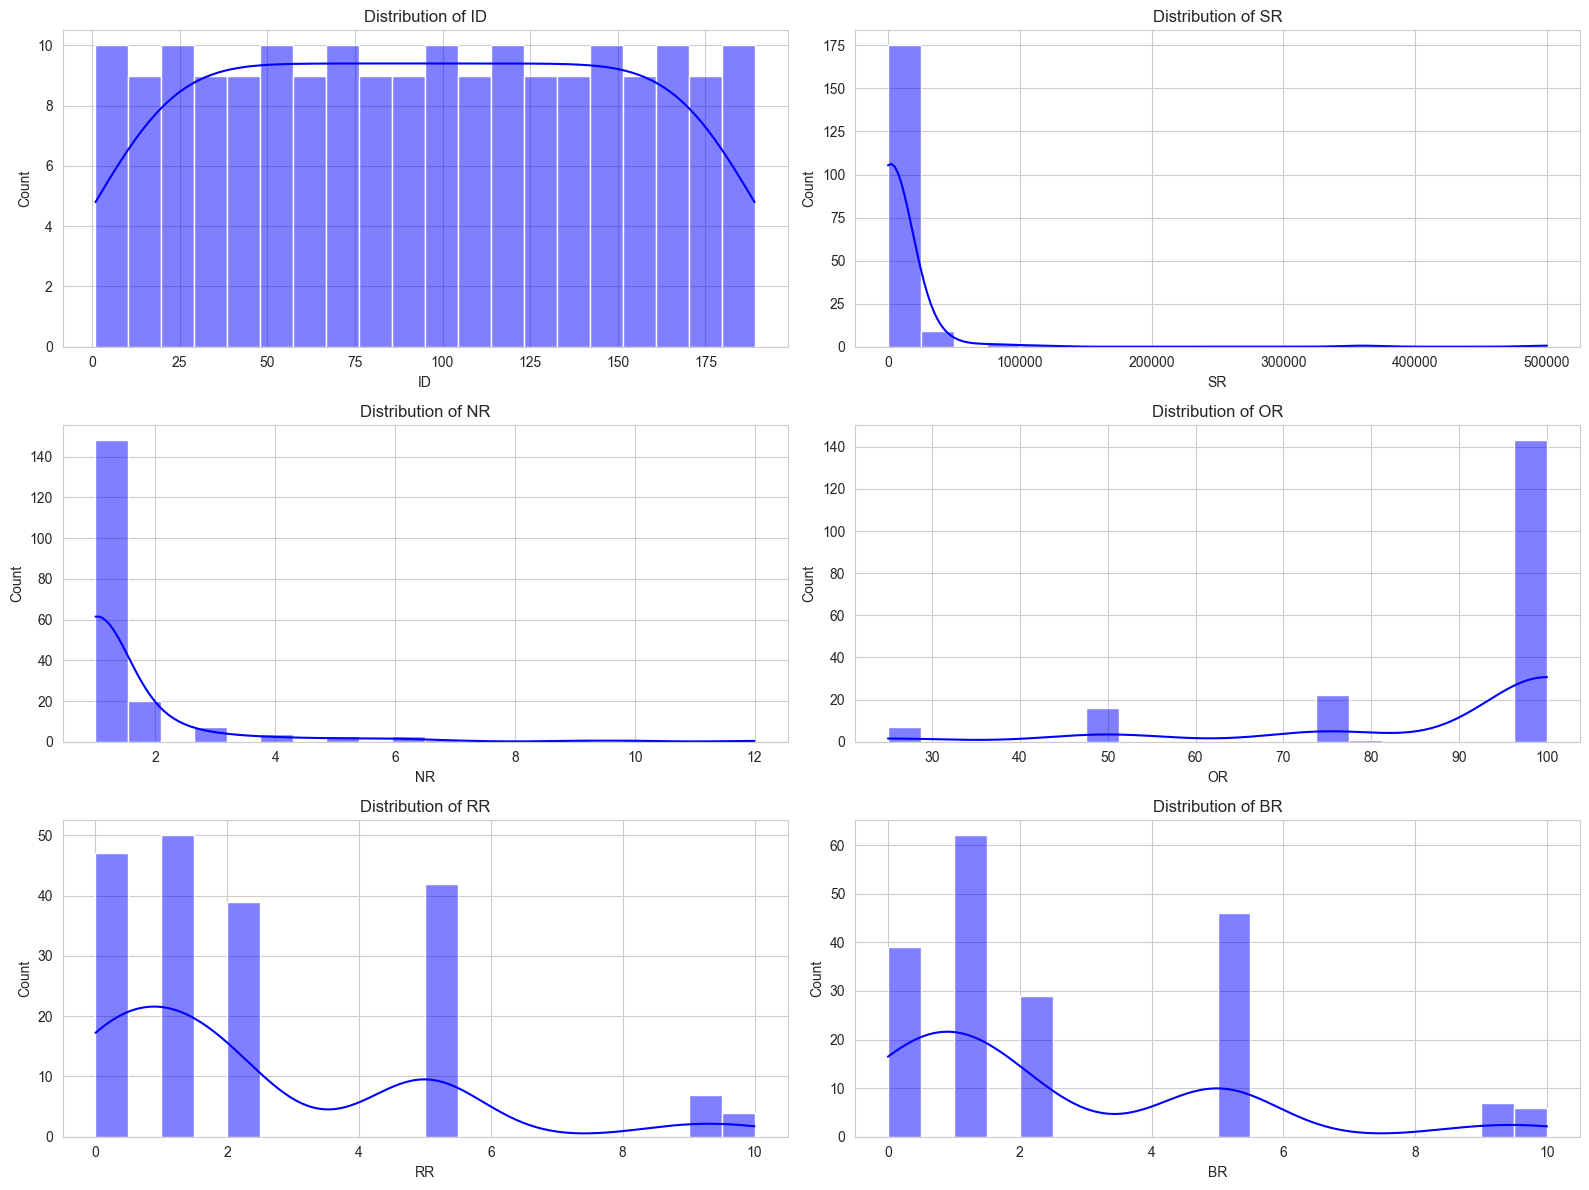

In [10]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(amphibians_df[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Correlation Heatmap

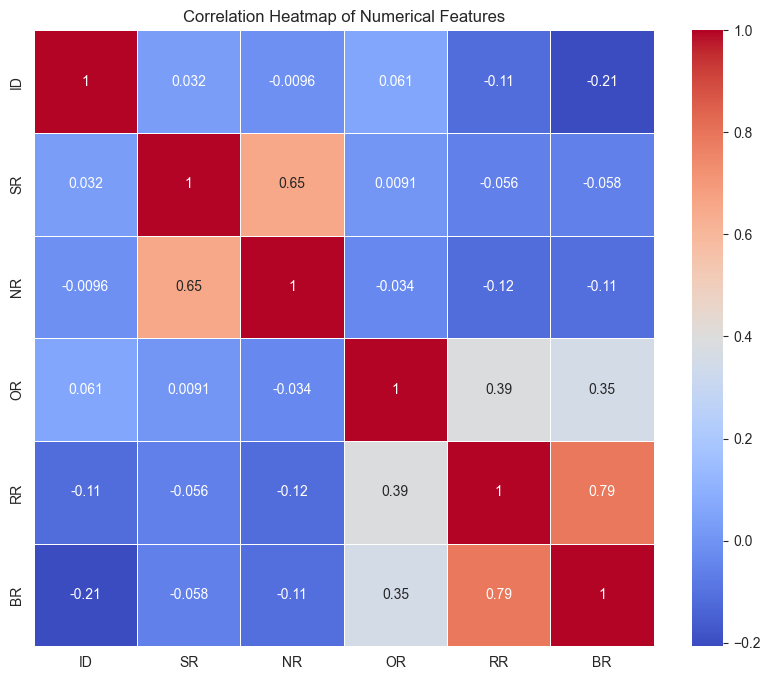

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = amphibians_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Pair Plot for Numerical Columns

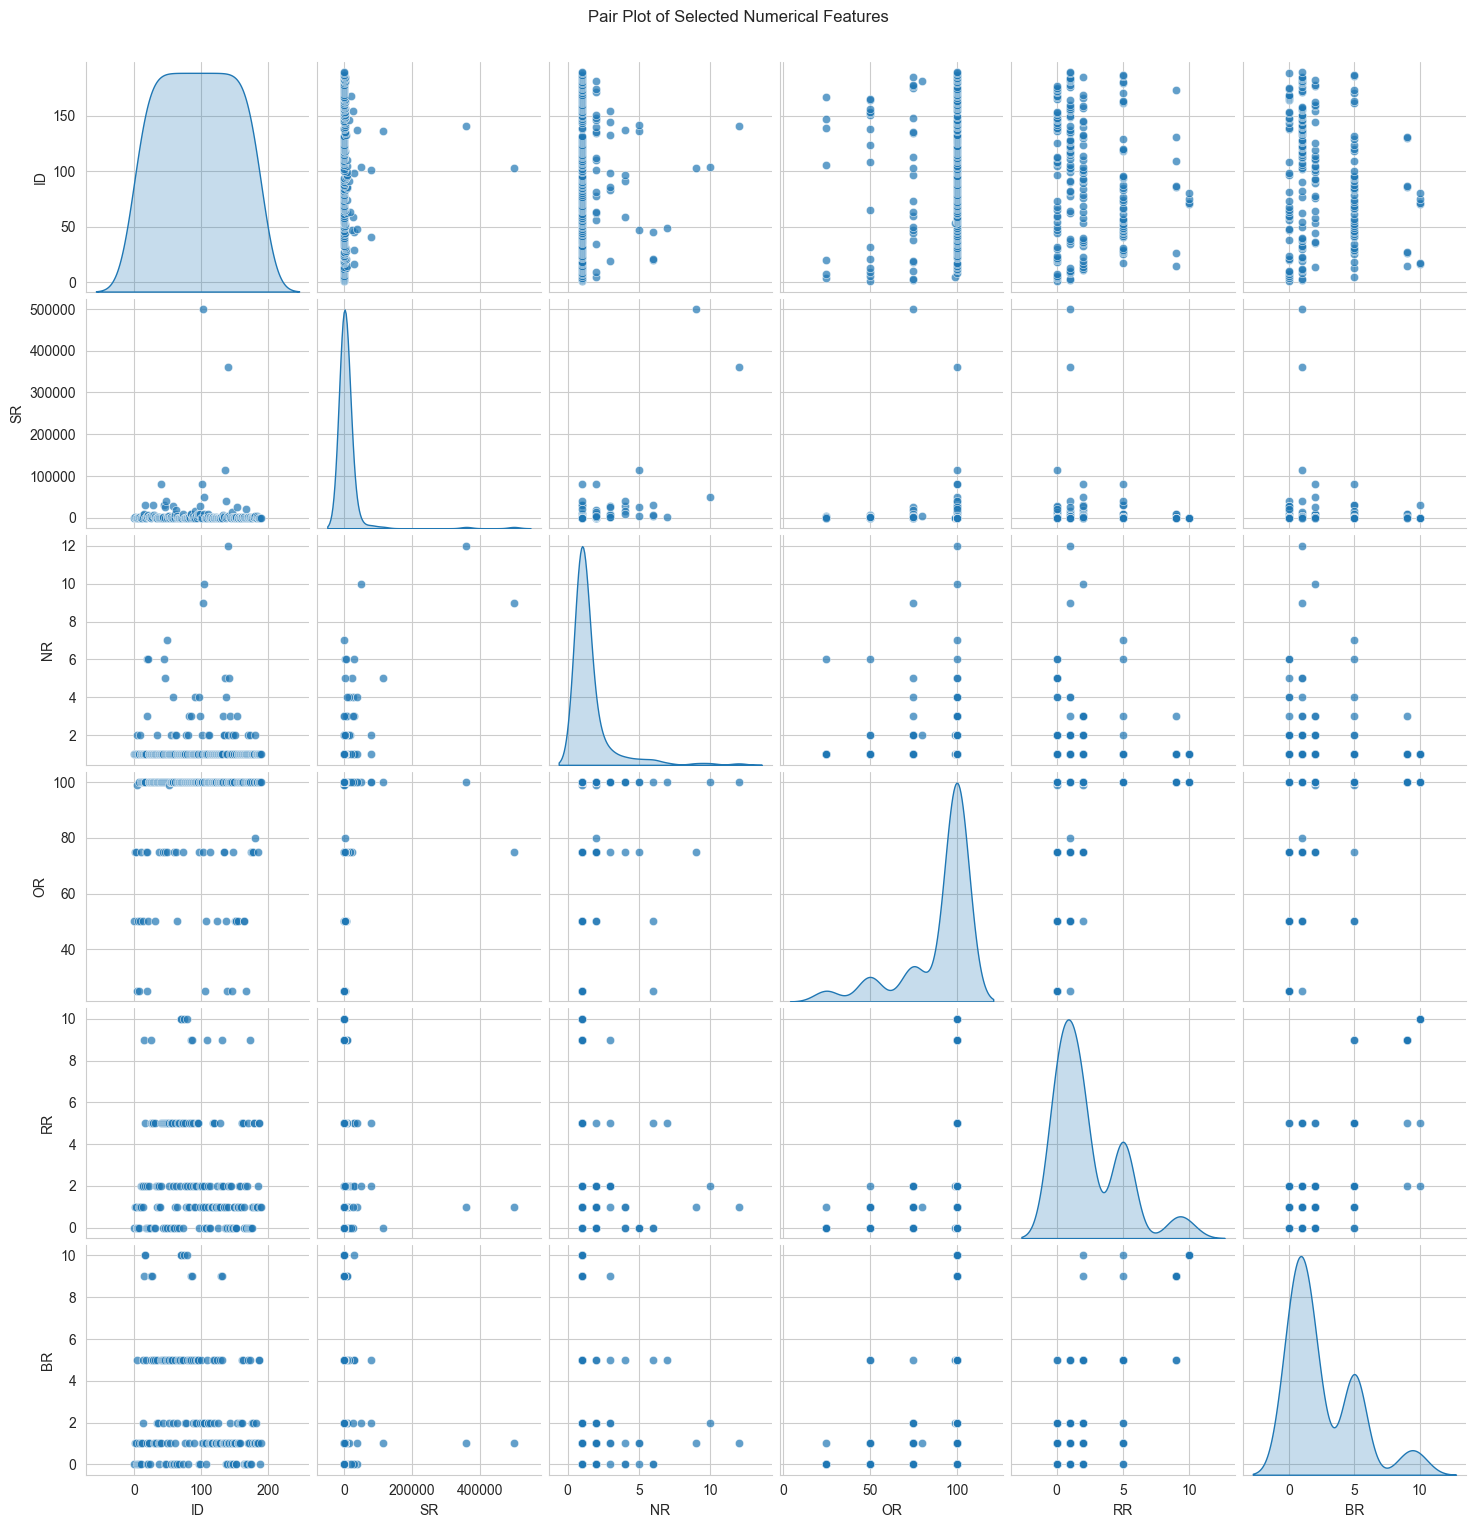

In [12]:
sns.pairplot(amphibians_df[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

### Count plot for Categorical MV column

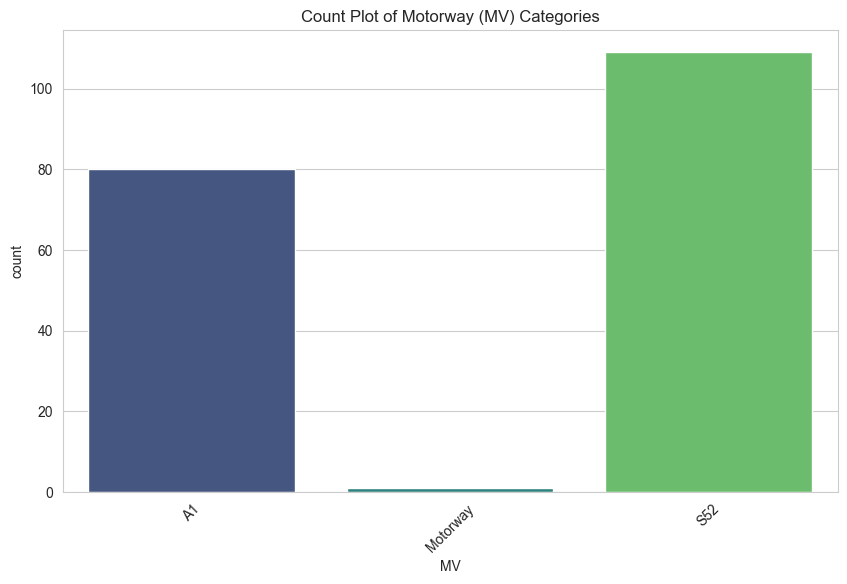

In [13]:
# 4. Count plot of a key categorical column (e.g., 'MV')
plt.figure(figsize=(10, 6))
sns.countplot(data=amphibians_df, x='MV', hue='MV', palette='viridis', legend=False)  # Assign hue to x and set legend=False
plt.title('Count Plot of Motorway (MV) Categories')
plt.xticks(rotation=45)
plt.show()

### Box Plot for Numerical vs. Categorical

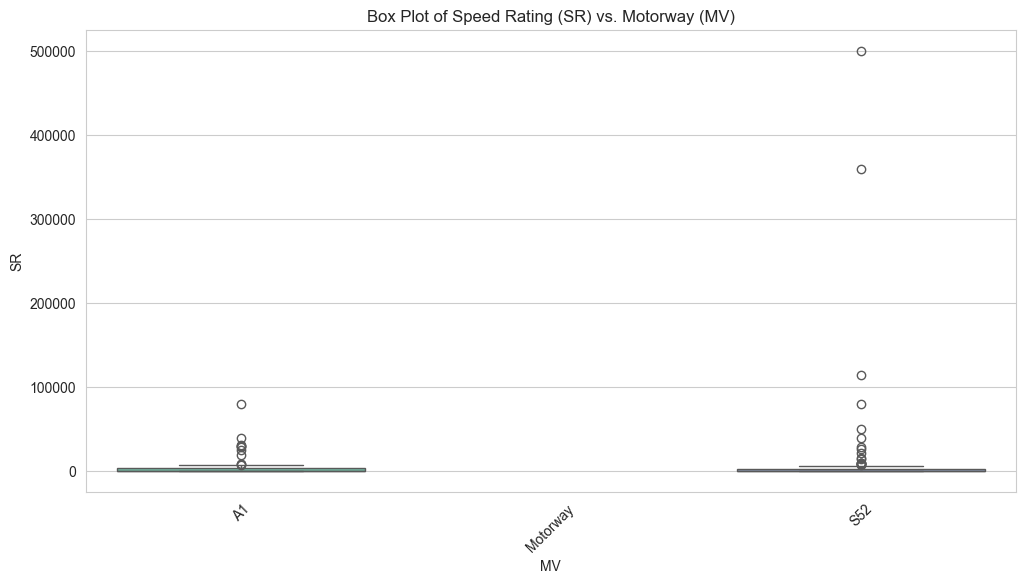

In [14]:
# 5. Box Plot for Numerical vs. Categorical
plt.figure(figsize=(12, 6))
sns.boxplot(x='MV', y='SR', data=amphibians_df, hue='MV', palette='Set2', legend=False)  # Assign hue to x
plt.title('Box Plot of Speed Rating (SR) vs. Motorway (MV)')
plt.xticks(rotation=45)
plt.show()

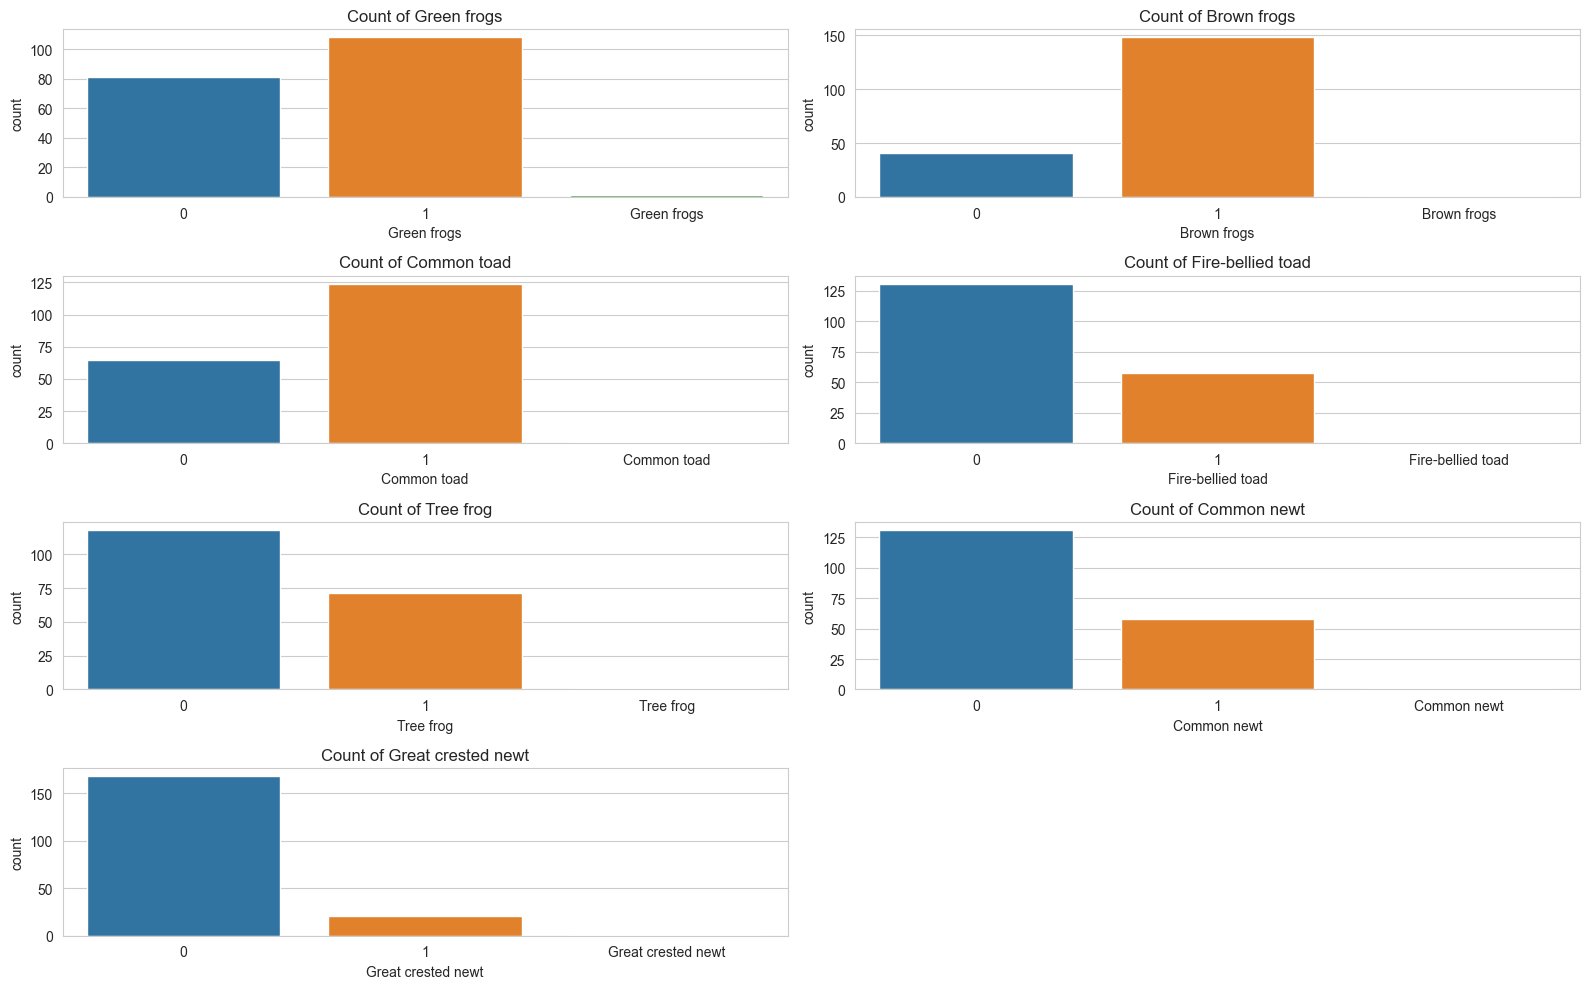

In [15]:
# 6. Count plots for Labels
plt.figure(figsize=(16, 10))
for i, label in enumerate(['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 
                           'Common newt', 'Great crested newt'], 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=label, data=amphibians_df, hue=label, legend=False)  # Assign hue to x
    plt.title(f'Count of {label}')
    plt.xlabel(label)
plt.tight_layout()
plt.show()
